# **Online Shoppers Purchasing Intention**

**Data Scientist Team 6 - Majestic** :
- Faiz Naida
- Fajar Arief
- Refi Fadholi
- Riswan Setiawan
- Shanna Sinaga
- Tegar Theo

---

# **STAGE 2 - Data Preprocessing**

# **0. Load Dataset**

In [3]:
# import library yang dibutuhkan

import pandas as pd 
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs 
from matplotlib import rcParams
%matplotlib inline
import warnings                        #Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [4]:
# load dataset

url = 'https://drive.google.com/file/d/1UJ07j4gSGHTDpw53wO3L2y4eoXesZbMN/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

#mengimpor dataset
df = pd.read_csv(dwn_url)

In [5]:
# membagi feature berdasarkan value numerik dan kategori 

cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
nums = ['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']  

# **1. Data Cleaning**
---

### **A ) Handle Missing Values**

In [6]:
# melihat jumlah missing value disetiap feature

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Tidak ada nilai yang kosong pada kolom**, sehingga tidak dilakukan handling missing value.

### **B ) Handle Duplicated Data**

In [7]:
# melihat jumlah duplikat

df.duplicated().sum()

125

In [8]:
df[df.duplicated(keep=False) == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [9]:
print(f'Jumlah row duplicated SEBELUM dihapus {df.duplicated().sum()}')

# menghapus duplikat

df.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated SEBELUM dihapus 125
Jumlah row duplicated SETELAH dihapus 0


In [10]:
# inisiasi update datadrame

df = df.drop_duplicates().reset_index(drop = True)

### **C ) Handle Outliers**

In [11]:
#Cek outlier

from scipy import stats
filtered_entries = np.array([True] * len(df))

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in nums:
    zscore = abs(stats.zscore(df[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df1 = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')
print(f'Prsentase outlier: {round((len(df)-len(df1))/len(df)*100, 2)}%')


Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Prsentase outlier: 17.9%


Presentase outlier dalam data 17.90%, nilai tersebut cukup besar, maka outlier tidak dihilangkan. Tidak dilakukan handle juga karena outlier ini bukan dari kesalahan dalam pengambilan data.

# **2. Feature Engineering**
---

### **A ) Feature Transformation**

Transformasi feature tidak menggunakan log karena data memiliki banyak value dengan nilai 0. PowerTransformer Yeo-Johnson dipilih untuk membuat distribusi lebih mendekati normal (Guassian) dan mendukung value data memiliki nilai positif atau negatif.

In [12]:
# transformasi data

from sklearn.preprocessing import PowerTransformer

for x in nums:
    pt = PowerTransformer(method='yeo-johnson')
    df[x] = pt.fit_transform(df[x].to_frame())

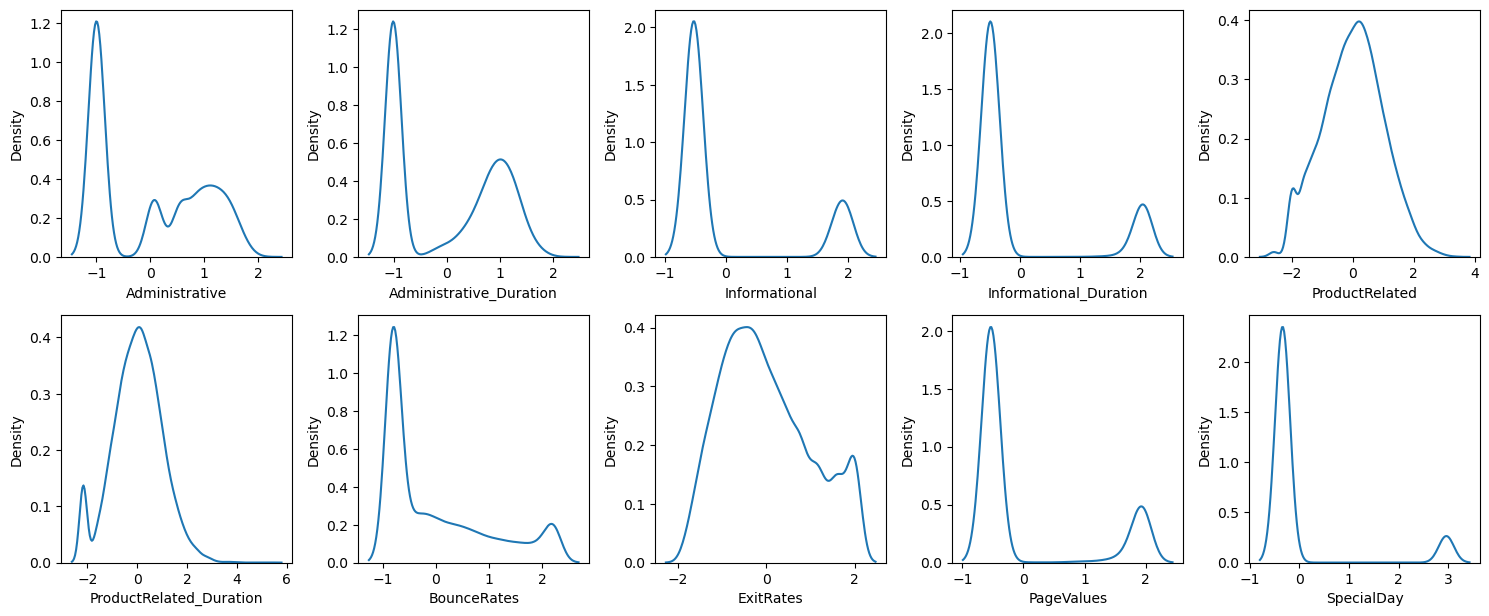

In [13]:
# cek distribusi data

features = nums
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [14]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
608,1.446582,1.223301,1.979993,2.035214,0.025421,0.294288,-0.802948,-0.873649,-0.532801,-0.33763,Mar,1,1,1,3,Returning_Visitor,False,False
7673,0.074401,-1.005468,-0.523851,-0.494799,-0.870293,-0.475628,2.017950,1.798532,-0.532801,-0.33763,June,3,2,2,4,Returning_Visitor,False,False
8019,0.074401,0.391058,-0.523851,-0.494799,-0.466390,-0.315925,-0.802948,-1.308826,-0.532801,-0.33763,Dec,3,2,8,8,New_Visitor,False,False
1609,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.689819,-0.802948,-0.427366,-0.532801,-0.33763,Mar,1,1,1,2,Returning_Visitor,False,False
2227,1.028024,1.357659,-0.523851,-0.494799,0.376630,0.265478,-0.802948,-1.223448,1.969812,-0.33763,May,1,1,1,4,New_Visitor,False,True


### **B ) Feature Encoding**

**Handle Feature VisitorType**

In [15]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

Value `Other` diinisiai kedalam `ReturningVisitor` (modus).

In [16]:
df['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

**Update Feature Kategori**

In [17]:
cats_updated = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [18]:
for col in cats_updated:
    print(f'Value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value counts of column Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
------------------------------ 

Value counts of column OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
------------------------------ 

Value counts of column Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
------------------------------ 

Value counts of column Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
------------------------------ 

Value counts of column TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40

**Strategi Encoding**:
> OperatingSystems, Browser, Region, TrafficType sudah memiliki feature numerik <br>
> Month akan dilakukan label encoding <br>
> VisitorType, Weekend, dan Revenue akan dilakukan One Hot Encoding <br>

#### **Label Encoding**

In [19]:
# membuat label peringkat berdasarkan jumlah peringkat user dari yang terbesar

month = df['Month'].value_counts().reset_index()
month_df = pd.DataFrame(month)
month_df['Month'] = (month_df['Month'].rank(ascending=False)).astype(int)
month_df

,index,Month
0,May,1
1,Nov,2
2,Mar,3
3,Dec,4
4,Oct,5
5,Sep,6
6,Aug,7
7,Jul,8
8,June,9
9,Feb,10


In [20]:
# mapping ke dataframe (run kode 1 x)

mapping_month = month_df.set_index('index')['Month'].to_dict()

df['Month'] = df['Month'].map(mapping_month)

In [21]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5288,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,2.899571,1,3,2,6,3,Returning_Visitor,False,False
4016,0.074401,0.640999,-0.523851,-0.494799,1.359813,1.105099,-0.518291,-1.024465,-0.532801,-0.337630,1,2,2,3,4,Returning_Visitor,False,False
12029,1.028024,0.834239,1.953214,1.813835,-0.551772,-0.407115,-0.802948,-0.760354,-0.532801,-0.337630,2,2,2,6,8,New_Visitor,True,False
210,1.028024,0.797354,-0.523851,-0.494799,-0.751231,0.000640,-0.111055,0.200527,-0.532801,-0.337630,3,1,2,6,6,Returning_Visitor,True,False
11410,-0.998474,-1.005468,-0.523851,-0.494799,-0.751231,-1.100396,1.877254,1.727166,-0.532801,-0.337630,2,2,2,3,13,Returning_Visitor,False,False


#### **One Hot Encoding**

In [22]:
for cat in ['VisitorType', 'Weekend', 'Revenue']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [23]:
# drop kolom yang tidak dibutuhkan

df = df.drop(columns=['VisitorType', 'Weekend', 'Revenue', 'VisitorType_New_Visitor', 'Weekend_False', 'Revenue_False'])

In [24]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
8108,-0.998474,-1.005468,-0.523851,-0.494799,0.309362,-0.025916,-0.802948,0.290465,-0.532801,-0.33763,2,2,2,3,1,1,1,0
8738,0.834177,0.630922,1.953214,2.076509,-0.551772,-0.712755,-0.802948,-0.760354,-0.532801,-0.33763,4,8,2,1,2,0,0,1
2500,-0.998474,-1.005468,-0.523851,-0.494799,-0.751231,-1.203502,1.877254,1.610382,-0.532801,-0.33763,1,3,2,1,3,1,1,0
11486,0.074401,0.544259,-0.523851,-0.494799,0.157980,0.420931,0.171740,0.200527,-0.532801,-0.33763,2,2,2,1,20,1,0,0
4915,-0.998474,-1.005468,-0.523851,-0.494799,-1.366868,-1.370247,1.979165,1.837570,-0.532801,-0.33763,1,2,2,4,3,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  float64
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  float64
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  float64
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  Month                          12205 non-null  int64  
 11  OperatingSystems               12205 non-null  int64  
 12  Browser                        12205 non-null 

### **C ) Handle Class Imbalance**

In [26]:
# pembuatan binary label target
df['revenue'] = df['Revenue_True'] == 1
df['revenue'].value_counts()

False    10297
True      1908
Name: revenue, dtype: int64

In [27]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['revenue', 'Revenue_True']]]
y = df['revenue'].values
print(X.shape)
print(y.shape)

(12205, 17)
(12205,)


### **D ) Feature Selection**

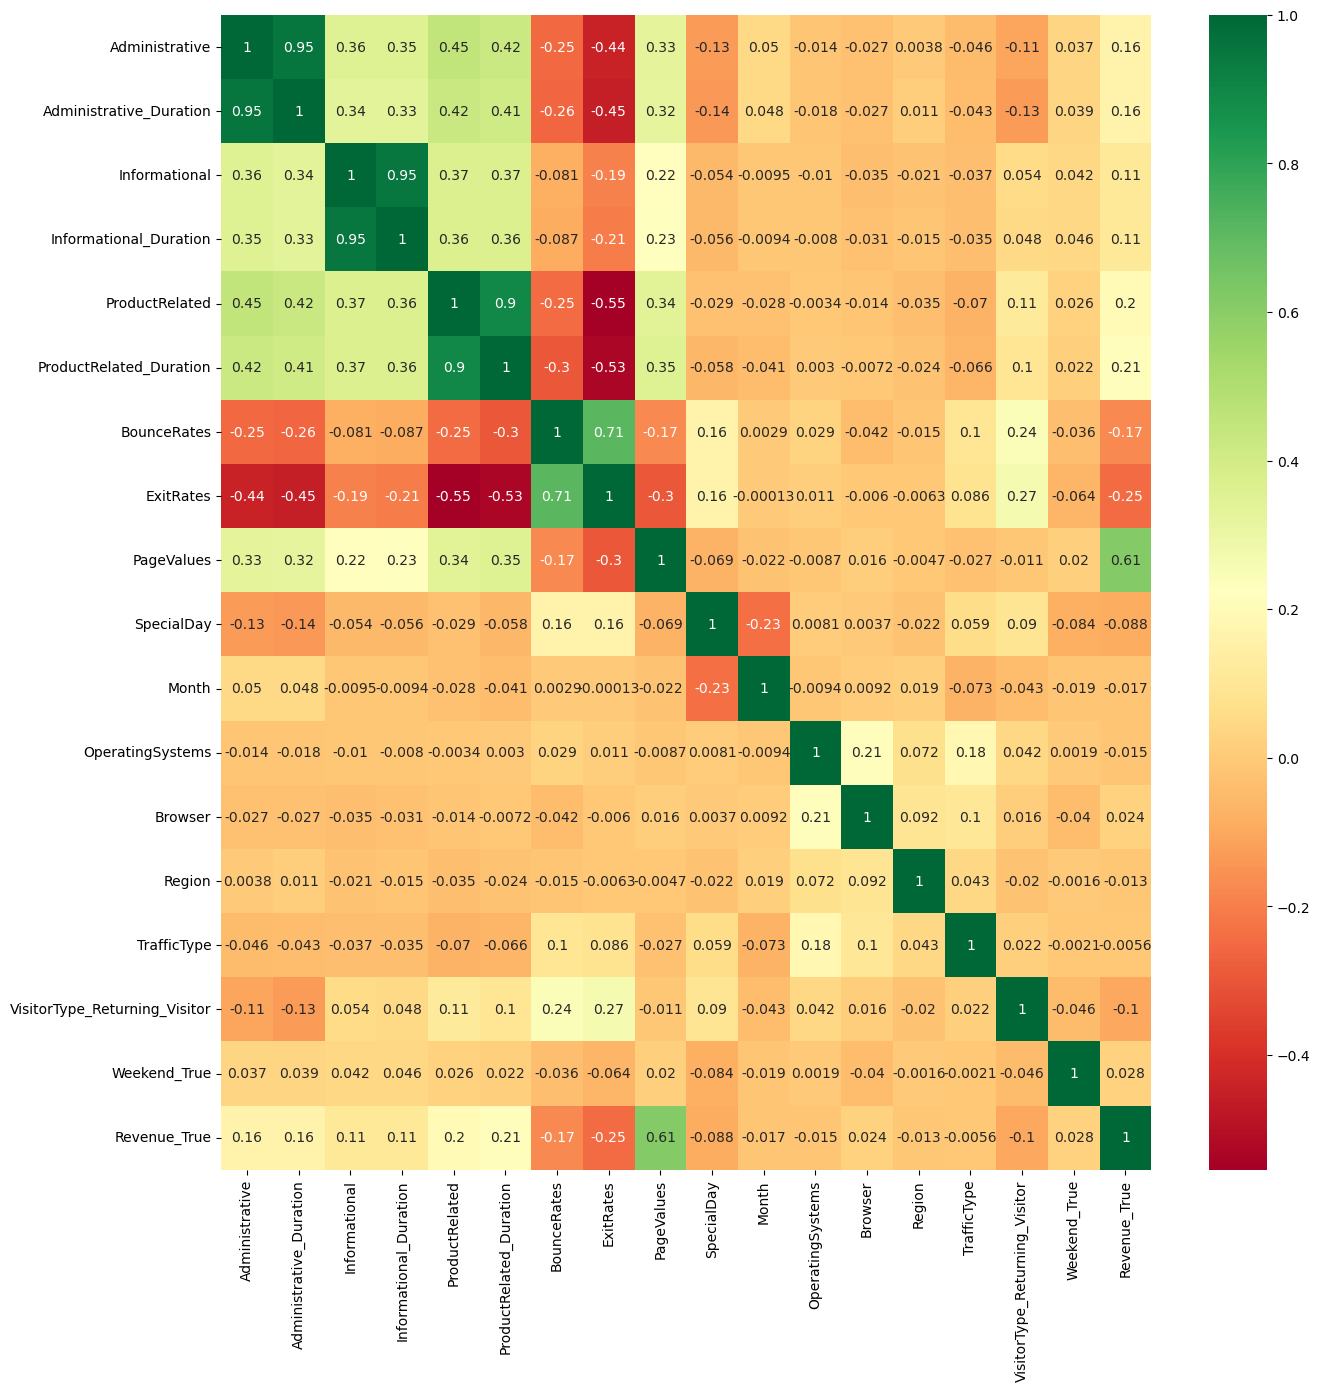

In [28]:
corrmat = df.loc[:, df.columns != 'revenue'].corr()
top_corr_features = corrmat.index 

plt.figure(figsize=(15,15)) 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Pada tahap feature selection ini fitur yang redundant adalah :
- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>
- BounceRates - ExitRates <br>

- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>

ketiganya akan dibuat feature extraction untuk mendapatkan durasi tiap page nya, sedangkan BounceRates - ExitRates, akan dipilih salah satu, yaitu ExitRates 


### **E ) Feature Extraction**

In [29]:
# memilih feature dengn korelasi tinggi dengan Revenue

x = corrmat['Revenue_True'] 
result = x[(x>0.05)|(x<-0.05)] # korelasi lebih dari 0.5
result

Administrative                   0.164376
Administrative_Duration          0.164306
Informational                    0.110966
Informational_Duration           0.107878
ProductRelated                   0.196981
ProductRelated_Duration          0.211123
BounceRates                     -0.172585
ExitRates                       -0.249863
PageValues                       0.611599
SpecialDay                      -0.088071
VisitorType_Returning_Visitor   -0.102694
Revenue_True                     1.000000
Name: Revenue_True, dtype: float64

In [30]:
df['Duration per Page Administrative'] = df['Administrative_Duration'] / df['Administrative']
df['Duration per Page Informational'] = df['Informational_Duration'] / df['Informational']
df['Duration per Page ProductRelated'] = df['ProductRelated_Duration'] / df['ProductRelated'] 

In [31]:
# save data set

In [32]:
df.to_csv('data_clean', index=False)

---